In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

url = 'https://fantasy.premierleague.com/api/bootstrap-static/'
r = requests.get(url)
json = r.json()

elements_df = pd.DataFrame(json['elements'])
elements_types_df = pd.DataFrame(json['element_types'])
teams_df = pd.DataFrame(json['teams'])

In [2]:
slim_elements_df = elements_df[['web_name','team','element_type','now_cost','selected_by_percent',
                                           'transfers_in','transfers_out','form','total_points','bonus',
                                           'points_per_game','value_season','minutes','goals_scored','assists',
                                           'clean_sheets','saves', 'ict_index']]

In [3]:
slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
slim_elements_df['value'] = slim_elements_df.value_season.astype(float)
slim_elements_df['form'] = slim_elements_df.form.astype(float)
slim_elements_df['selected_by_percent'] = slim_elements_df.selected_by_percent.astype(float)
slim_elements_df['ict_index'] = slim_elements_df.ict_index.astype(float)
slim_elements_df['now_cost'] = slim_elements_df['now_cost'] / 10
slim_elements_df = slim_elements_df.loc[slim_elements_df.value > 0]
del slim_elements_df['value_season']
del slim_elements_df['element_type']
data = slim_elements_df

<ipython-input-3-79b21e96b722>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['position'] = slim_elements_df.element_type.map(elements_types_df.set_index('id').singular_name)
<ipython-input-3-79b21e96b722>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slim_elements_df['team'] = slim_elements_df.team.map(teams_df.set_index('id').name)
<ipython-input-3-79b21e96b722>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

In [4]:
data.sort_values('ict_index', ascending=False)

,web_name,team,now_cost,selected_by_percent,transfers_in,transfers_out,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,ict_index,position,value
373,Salah,Liverpool,13.2,61.4,5793242,5056249,7.0,212,25,8.5,2161,19,11,13,0,342.7,Midfielder,16.1
439,Fernandes,Man Utd,11.6,16.4,2399092,5098246,5.2,129,15,4.8,2307,9,6,7,0,246.7,Midfielder,11.1
370,Mané,Liverpool,11.7,3.5,761984,845006,7.4,134,6,5.6,2046,12,4,12,0,237.9,Midfielder,11.5
568,Son,Spurs,10.8,20.9,5012078,4997791,6.2,145,14,6.3,1984,11,7,10,0,222.2,Midfielder,13.4
377,Alexander-Arnold,Liverpool,8.5,46.1,4066153,2851466,6.0,174,31,7.2,2133,2,11,14,0,221.6,Defender,20.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Costa,Leeds,5.4,0.0,1668,15029,0.0,1,0,1.0,21,0,0,0,0,0.0,Midfielder,0.2
347,Greenwood,Leeds,4.5,1.5,326497,284634,0.0,1,0,1.0,12,0,0,0,0,0.0,Forward,0.2
352,McCarron,Leeds,4.4,0.0,1679,1570,0.0,1,0,1.0,9,0,0,0,0,0.0,Midfielder,0.2
355,McKinstry,Leeds,4.3,0.4,74889,49659,0.0,1,0,1.0,3,0,0,0,0,0.0,Midfielder,0.2


In [5]:
# pivot = data.pivot_table(index='team',values=['value', 'now_cost'],aggfunc=None).reset_index()
# pivot

In [6]:
# value_over_20 = data.loc[data['value']>20]
# sns.scatterplot(x='selected_by_percent', y='total_points', data=value_over_20)
# xs = value_over_20['selected_by_percent']
# ys= value_over_20['total_points']
# list_of_texts = value_over_20['second_name']
# for x, y, text in zip(xs, ys, list_of_texts):
#     plt.annotate(text, (x, y), fontsize=8, alpha=0.75)
# plt.xlabel('Selected by (%)')
# plt.ylabel('Total number of points')
# plt.show()

In [7]:
# for x, y, text in zip(xs, ys, list_of_texts):
#     plt.annotate(text, (x, y), fontsize=5, alpha=0.75)

In [8]:
data.loc[data['ict_index'] >200].sort_values('ict_index', ascending=False)

,web_name,team,now_cost,selected_by_percent,transfers_in,transfers_out,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,ict_index,position,value
373,Salah,Liverpool,13.2,61.4,5793242,5056249,7.0,212,25,8.5,2161,19,11,13,0,342.7,Midfielder,16.1
439,Fernandes,Man Utd,11.6,16.4,2399092,5098246,5.2,129,15,4.8,2307,9,6,7,0,246.7,Midfielder,11.1
370,Mané,Liverpool,11.7,3.5,761984,845006,7.4,134,6,5.6,2046,12,4,12,0,237.9,Midfielder,11.5
568,Son,Spurs,10.8,20.9,5012078,4997791,6.2,145,14,6.3,1984,11,7,10,0,222.2,Midfielder,13.4
377,Alexander-Arnold,Liverpool,8.5,46.1,4066153,2851466,6.0,174,31,7.2,2133,2,11,14,0,221.6,Defender,20.5
658,Bowen,West Ham,6.9,25.7,3894729,1733051,5.8,153,16,5.5,2361,8,13,7,0,219.4,Midfielder,22.2
411,Bernardo,Man City,7.2,17.4,4068750,2770868,4.0,128,14,4.7,2317,7,6,14,0,213.9,Midfielder,17.8
566,Kane,Spurs,12.3,16.2,2946219,2652258,7.2,109,14,4.4,2151,10,3,8,0,212.9,Forward,8.9
651,Antonio,West Ham,7.6,31.3,7264246,6863088,2.4,112,13,4.1,2380,8,8,7,0,208.6,Forward,14.7
19,Saka,Arsenal,6.5,23.0,3533000,2688587,6.5,122,11,4.9,1910,8,6,11,0,204.5,Midfielder,18.8


In [9]:
data.loc[data['web_name'] == 'Mbeumo']

,web_name,team,now_cost,selected_by_percent,transfers_in,transfers_out,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,ict_index,position,value
102,Mbeumo,Brentford,5.2,1.0,659353,672060,1.6,75,3,3.0,2049,3,3,5,0,120.5,Midfielder,14.4


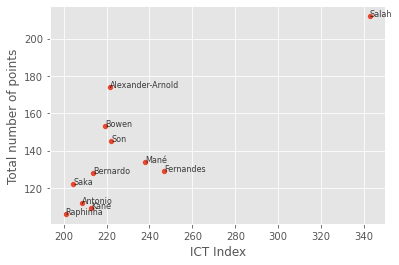

In [20]:
viz = data.loc[data['ict_index'] >200]
sns.scatterplot(x='ict_index', y='total_points', data=viz)


In [40]:
viz_2 = data.loc[data['ict_index'] < 100].loc[data['total_points'] > 70].loc[data['position'].isin(['Midfielder','Forward'])].sort_values('total_points', ascending=False).head(10)
viz_2

,web_name,team,now_cost,selected_by_percent,transfers_in,transfers_out,form,total_points,bonus,points_per_game,minutes,goals_scored,assists,clean_sheets,saves,ict_index,position,value
191,Jorginho,Chelsea,5.8,4.8,855021,932890,2.0,89,10,4.0,1686,6,1,9,0,95.2,Midfielder,15.3
63,Ramsey,Aston Villa,4.8,10.2,1267001,394765,3.8,81,6,3.4,1680,5,1,9,0,92.1,Midfielder,16.9
552,Broja,Southampton,5.5,15.7,2149978,807320,2.3,78,11,3.4,1390,6,2,4,0,93.1,Forward,14.2
66,Ings,Aston Villa,7.7,7.6,1363432,3636939,3.3,75,9,3.8,1374,5,4,6,0,87.5,Forward,9.7
372,Fabinho,Liverpool,5.4,1.2,188560,178582,3.8,75,6,3.8,1701,4,1,11,0,90.2,Midfielder,13.9
87,Canós,Brentford,5.5,1.2,416061,440628,2.0,73,5,2.7,1973,2,3,7,0,95.8,Midfielder,13.3
436,Fred,Man Utd,4.9,1.0,317398,295597,2.3,73,4,3.3,1673,3,4,7,0,96.3,Midfielder,14.9
676,Moutinho,Wolves,4.9,1.0,203198,170899,0.7,73,7,3.0,1986,2,1,9,0,94.2,Midfielder,14.9


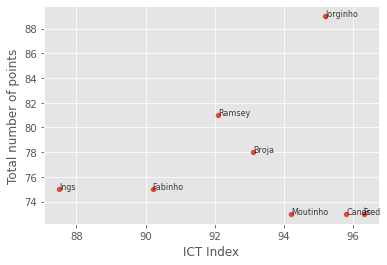

In [41]:
sns.scatterplot(x='ict_index', y='total_points', data=viz_2)
xs = viz_2['ict_index']
ys= viz_2['total_points']
list_of_texts = viz_2['web_name']
for x, y, text in zip(xs, ys, list_of_texts):
    plt.annotate(text, (x, y), fontsize=8, alpha=0.75)
plt.xlabel('ICT Index')
plt.ylabel('Total number of points')
plt.show()